# **PREDICTING THE LIKELIHOOD OF H1N1 AND SEASONAL FLU VACCINES UPTAKE.**

# **1. Project Overview.**

Vaccination is a critical public health measure for preventing the spread of infectious diseases, including H1N1 and seasonal influenza. However, vaccine uptake can vary significantly across different populations due to factors such as access to healthcare, socioeconomic status, education, and cultural beliefs. In Kenya, understanding the predictors of vaccine uptake is essential for improving vaccination campaigns and ensuring widespread protection against these diseases. 

# **2. Business Understanding.**
## **2.1 Business Problem.**
The year is 2024. There has been an outbreak of H1N1 and Seasonal Flu in the country. Various measures need to be put in place to curb the spread of the flu. Various health providers are stressed by the situation because it is getting out of their hands, its very alarming and causing a lot of panic across all divides. As an experienced Data scienist, I have been hired by the Ministry of Health - Kenya (MoH-Kenya) to help them come up with a model to help them predict how likely the citizens are to receive their H1N1 and Seasonal Flu vaccines and their perception of the same.

## **2.2 Stakeholders.**
The main stakeholders of this project or rather the beneficiaries are The Health Providers such as Ministry of Health, Hospitals such as Kenyatta National Hospital, Aghakan Hospital among others and NGOs such as Centre for Diseases Control (CDC) and World Health Organization (WHO). The models that I will come up with will enable them make informed decisions when rolling out vaccinations campaigns programmes across the country.

## **2.3 Objectives.**
The main objective of this project is to predict whether or not respondents will receive the H1N1 and Seasonal Flu vaccines.

Specific Objectives;
- I will use machine learning models such as Logistic Regression and
- Decision Trees Classifier to make the predictions. 

## **3. Data Understanding.**
A vaccine for the H1N1 flu virus became publicly available in October 2009. In late 2009 and early 2010, the United States conducted the National 2009 H1N1 Flu Survey. This phone survey asked respondents whether they had received the H1N1 and seasonal flu vaccines, in conjunction with questions about themselves. These additional questions covered their social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission. A better understanding of how these characteristics are associated with personal vaccination patterns can provide guidance for future public health efforts.

## **4. Data Preparation.**

### **Importing Libraries.**

In [12]:
# Importing Relevant Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

import xgboost     # extreme gradient boosting

### **Loading Data.**

In [13]:
df_test_set = pd.read_csv("test_set_features.csv")
df_test_set.head(10)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
5,26712,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Own,Employed,mlyzmhmf,"MSA, Principle City",0.0,2.0,fcxhlnwr,cmhcxjea
6,26713,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,NaN,Married,Own,Not in Labor Force,fpwskwrf,"MSA, Not Principle City",1.0,0.0,NaN,NaN
7,26714,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Unemployed,oxchjgsf,"MSA, Not Principle City",1.0,0.0,NaN,NaN
8,26715,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,Married,Own,Not in Labor Force,oxchjgsf,"MSA, Not Principle City",1.0,0.0,NaN,NaN
9,26716,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,"> $75,000",Not Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",0.0,0.0,NaN,NaN


In [14]:
df_training_set = pd.read_csv("training_set_features.csv")
df_training_set.head(10)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN


In [15]:
df_training_set_labels = pd.read_csv("training_set_labels.csv")
df_training_set_labels.head(10)

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
5,5,0,0
6,6,0,0
7,7,1,1
8,8,0,0
9,9,0,0


In [16]:
# checking data types
df_test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [38]:
# explore numerical columns
df_test_set.describe

<bound method NDFrame.describe of        respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              26707           2.0             2.0                        0.0   
1              26708           1.0             1.0                        0.0   
2              26709           2.0             2.0                        0.0   
3              26710           1.0             1.0                        0.0   
4              26711           3.0             1.0                        1.0   
...              ...           ...             ...                        ...   
26703          53410           1.0             1.0                        0.0   
26704          53411           3.0             1.0                        0.0   
26705          53412           0.0             1.0                        0.0   
26706          53413           3.0             1.0                        0.0   
26707          53414           2.0             1.0                        0

In [20]:
# checking the number of rows and columns
df_test_set.shape

(26708, 36)

##### **Number of rows:** 26708
##### **Number of columns:** 36

In [18]:
df_test_set.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

## **H1N1 and Seasonal Flu Vaccines Columns Descriptions.**

- **h1n1_concern** - Level of concern about the H1N1 flu.
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
- **h1n1_knowledge** - Level of knowledge about H1N1 flu.
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
- **behavioral_antiviral_meds** - Has taken antiviral medications. (binary)
- **behavioral_avoidance** - Has avoided close contact with others with flu-like symptoms. (binary)
- **behavioral_face_mask** - Has bought a face mask. (binary)
- **behavioral_wash_hands** - Has frequently washed hands or used hand sanitizer. (binary)
- **behavioral_large_gatherings** - Has reduced time at large gatherings. (binary)
- **behavioral_outside_home** - Has reduced contact with people outside of own household. (binary)
- **behavioral_touch_face** - Has avoided touching eyes, nose, or mouth. (binary)
- **doctor_recc_h1n1** - H1N1 flu vaccine was recommended by doctor. (binary)
- **doctor_recc_seasonal** - Seasonal flu vaccine was recommended by doctor. (binary)
- **chronic_med_condition** - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
- **child_under_6_months** - Has regular close contact with a child under the age of six months. (binary)
- **health_worker** - Is a healthcare worker. (binary)
- **health_insurance** - Has health insurance. (binary)
- **opinion_h1n1_vacc_effective** - Respondent's opinion about H1N1 vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- **opinion_h1n1_risk** - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- **opinion_h1n1_sick_from_vacc** - Respondent's worry of getting sick from taking H1N1 vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- **opinion_seas_vacc_effective** - Respondent's opinion about seasonal flu vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- **opinion_seas_risk** - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- **opinion_seas_sick_from_vacc** - Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- **age_group** - Age group of respondent.
- **education** - Self-reported education level.
- **race** - Race of respondent.
- **sex** - Sex of respondent.
- **income_poverty** - Household annual income of respondent with respect to 2008 Census poverty thresholds.
- **marital_status** - Marital status of respondent.
- **rent_or_own** - Housing situation of respondent.
- **employment_status** - Employment status of respondent.
- **hhs_geo_region** - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
- **census_msa** - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
- **household_adults** - Number of other adults in household, top-coded to 3.
- **household_children** - Number of children in household, top-coded to 3.
- **employment_industry** - Type of industry respondent is employed in. Values are represented as short random character strings.
- **employment_occupation** - Type of occupation of respondent. Values are represented as short random character strings.

In [39]:
# Check for duplicates
df_test_set.duplicated().sum()

0

### **Handling missing values**

In [58]:
# Check for missing values in the dataset
missing_values = df_test_set.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(df_test_set)) * 100

# Combine the count and percentage of missing values into one DataFrame
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})

# Display columns with missing values
missing_data = missing_data[missing_data['Missing Values'] > -0.1].sort_values(by='Percentage (%)', ascending=False)

missing_data

,Missing Values,Percentage (%)
employment_occupation,13426,50.269582
employment_industry,13275,49.704208
income_poverty,4497,16.837652
rent_or_own,2036,7.623184
employment_status,1471,5.507713
marital_status,1442,5.399131
education,1407,5.268084
hhs_geo_region,0,0.000000
census_msa,0,0.000000
household_adults,0,0.000000


In [40]:
# filling null values with mean
df_test_set = df_test_set.fillna(df_test_set.mean())
df_test_set.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


### **Encoding categorical variables**

In [41]:
# Identify categorical columns
categorical_cols = df_test_set.select_dtypes(include=['object']).columns

# Perform one-hot encoding on categorical columns
data_encoded = pd.get_dummies(df_test_set, columns=categorical_cols, drop_first=True)

# Display the first 10 rows of the transformed data
data_encoded.head()


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


# 5. **Exploratory Data Analysis (EDA).**

### **Pair plot**

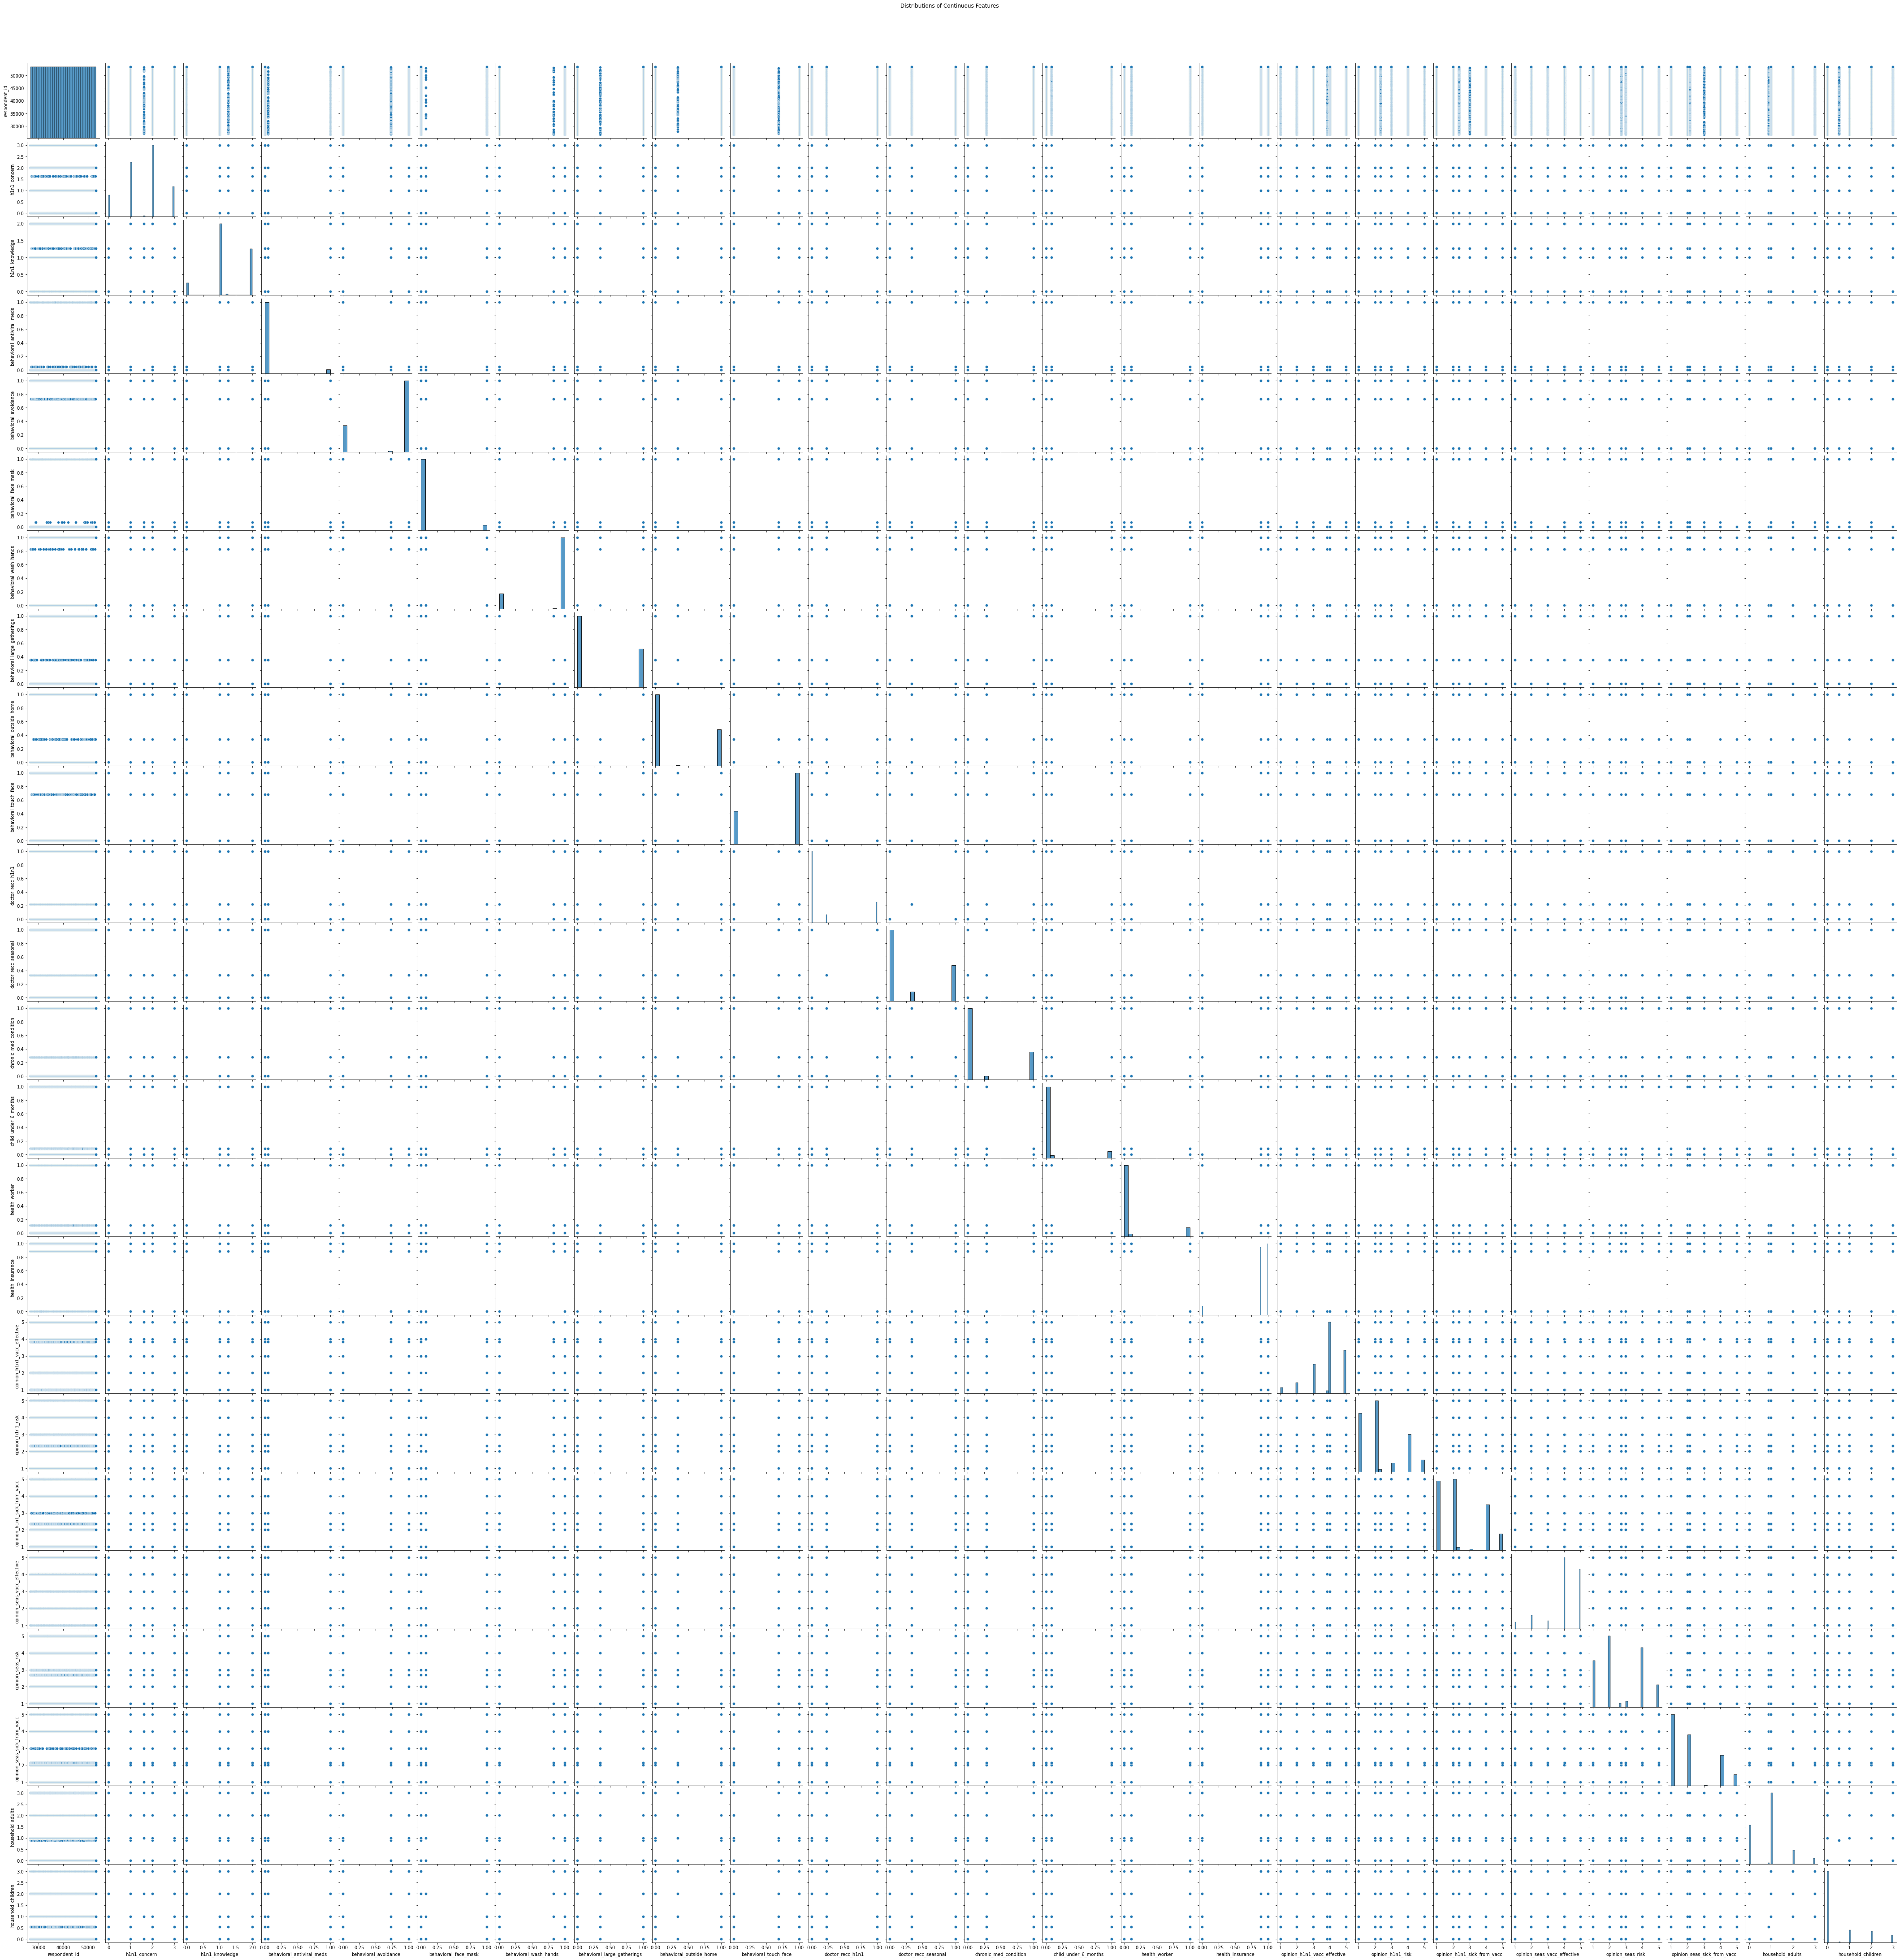

In [65]:
sns.pairplot(df_test_set)
plt.suptitle('Distributions of Continuous Features', y=1.02)  
plt.show()

### **Feature engineering**

In [62]:
df_test_set.corr()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
respondent_id,1.000000,0.006903,-0.005703,-0.000074,0.008845,0.014763,0.003441,0.019432,0.017230,0.004976,...,-0.005117,-0.007549,0.002621,0.005170,0.006787,-0.003737,0.005359,0.012605,0.000919,0.001824
h1n1_concern,0.006903,1.000000,0.067845,0.099867,0.217604,0.141581,0.282709,0.258486,0.245477,0.240014,...,0.026784,-0.001826,0.216600,0.359635,0.351297,0.210941,0.309672,0.219041,0.000390,0.050828
h1n1_knowledge,-0.005703,0.067845,1.000000,-0.006004,0.081138,0.016224,0.081427,-0.052918,-0.067325,0.079640,...,0.159206,0.089735,0.123474,0.088537,-0.006110,0.088305,0.084180,-0.041801,0.035605,0.061528
behavioral_antiviral_meds,-0.000074,0.099867,-0.006004,1.000000,0.059936,0.154468,0.067733,0.116859,0.134208,0.080816,...,0.019099,-0.034726,0.039430,0.107951,0.092215,0.015551,0.093882,0.096376,0.044272,0.093595
behavioral_avoidance,0.008845,0.217604,0.081138,0.059936,1.000000,0.070276,0.321898,0.229357,0.230230,0.331648,...,-0.010667,0.022520,0.108281,0.118532,0.126594,0.117493,0.127500,0.073929,0.025726,0.046142
behavioral_face_mask,0.014763,0.141581,0.016224,0.154468,0.070276,1.000000,0.085311,0.156560,0.161098,0.103763,...,0.064889,-0.013991,0.037159,0.127012,0.110714,0.034040,0.103491,0.084458,0.009959,0.019654
behavioral_wash_hands,0.003441,0.282709,0.081427,0.067733,0.321898,0.085311,1.000000,0.188719,0.192273,0.365448,...,0.043625,0.021831,0.130047,0.168298,0.150763,0.129199,0.168130,0.091805,0.035906,0.049316
behavioral_large_gatherings,0.019432,0.258486,-0.052918,0.116859,0.229357,0.156560,0.188719,1.000000,0.591763,0.250370,...,-0.036479,-0.044671,0.048027,0.143043,0.182050,0.078954,0.130801,0.143164,-0.017125,0.004142
behavioral_outside_home,0.017230,0.245477,-0.067325,0.134208,0.230230,0.161098,0.192273,0.591763,1.000000,0.270826,...,-0.023307,-0.041322,0.039284,0.126124,0.169559,0.066865,0.118126,0.140297,-0.023383,0.003847
behavioral_touch_face,0.004976,0.240014,0.079640,0.080816,0.331648,0.103763,0.365448,0.250370,0.270826,1.000000,...,0.073558,0.013294,0.097530,0.148770,0.139659,0.106822,0.145340,0.087946,0.011216,0.036431


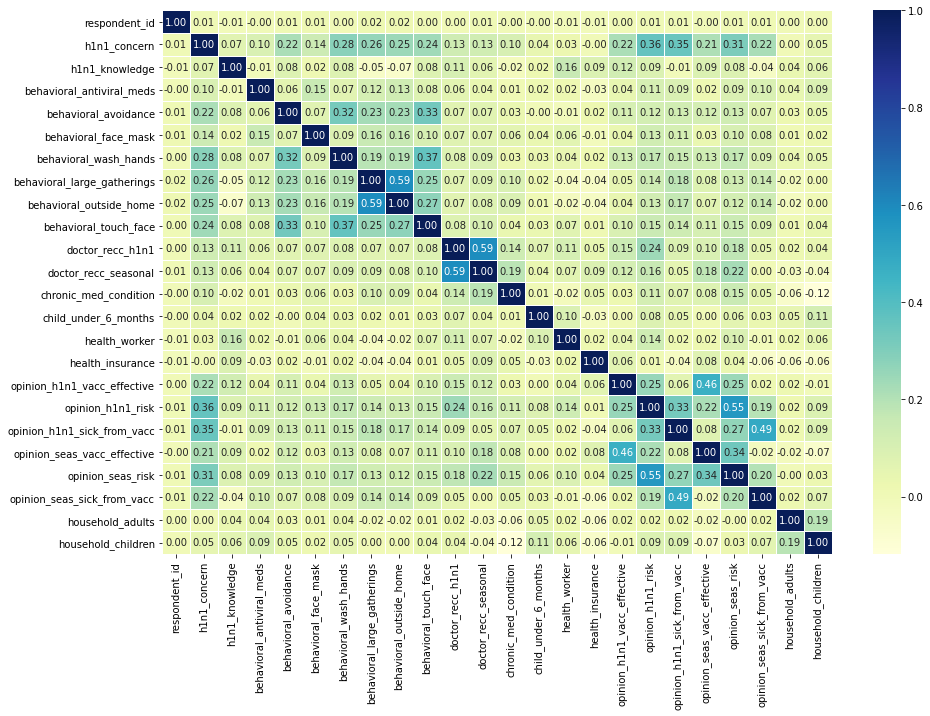

In [67]:
corr_matrix = df_test_set.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, 
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");